# Ejercicios: Ecuaciones no lineales - A. Numerico Schwarz 1c 2019



## 1. Metodo de la Bisección

#### Sea $f(x) = 5*sin(x/3) - x^{3}$, queremos resolver $f(x) = 0$ utilizando el método de la bisección.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return 5*np.sin(x/3) - x**3


a = -100
b = 100
vec = np.vectorize(function)

plt.plot(range(a,b), vec(range(a,b)))
plt.show()

<Figure size 640x480 with 1 Axes>

#### Deberiamos verificar que $f(a) * f(b) < 0$, podemos ver que se verifica:

In [2]:
a = -2
b = 6
print(function(a)*function(b))

-1037.8457673806072


#### Viendo que $x \in (a,b)$, podemos calcular nuestra primera aproximación tomando el valor medio del intervalo:

In [3]:
x_1 = (b + a)/2
print(function(x_1))

-4.908150984651315


#### Como no verifica que $f(x_1) = 0$ entonces debemos seguir buscando el resultado.

#### Verificamos si $f(a)*f(x_1) < 0$, si es cierto, entonces nuestro nuevo intervalo sera $(a, x_1)$ en caso contrario sera $(x_1, b)$

In [4]:
print(function(a)*function(x_1))

-24.089946088133676


#### Realizamos el mismo procedimiento que en el caso anterior (si fuera el otro intervalo sería lo mismo pero con $x_1$ y $b$

$$x_2 = \frac{x_1 + a}{2}$$
$$x_2 = \frac{\frac{b+a}{2} + a}{2} = \frac{b + a}{4} + \frac{a}{2}$$

#### Que también puede verse como: $$x_2 = x_1 - \frac{b-a}{4}$$

#### Si seguimos realizando los mismos procedimientos, podemos llegar a la conclusion de que: $$x_n = x_{n-1} - \frac{b-a}{2^{n}}$$

In [48]:
a = -2
b = 6
x = []
x.append((b+a)/2)
rel_err = 1
epsilon = 10**-15
i = 0
MAX_ITER = 1000

while(rel_err > epsilon and i < MAX_ITER):
    
    # Si la funcion en ese punto es nula ya encontramos la solucion.
    if(function(x[i]) == 0):
        break
        
    # Calcular para ver intervalo donde esta el cero.
    sgn = function(a)*function(x[i])
    
    if(sgn < 0):
        # Nuevo fin de intervalo
        b = x[i]
    else:
        # Nuevo inicio de intervalo
        a = x[i]
    
    # Agregar a valores hallados.
    x.append( (b+a)/2 )
    
    # Incrementar x actual
    i = i + 1    
    
    # Calcular error relativo.
    if(x[i] != 0):
        rel_err = abs(x[i] - x[i-1]) / abs(x[i])
        #print("Relative error: " + str(rel_err))


print("Cantidad de iteraciones:",i)
print("La solución es:",x[i],"pues la funcion en ese punto vale:",function(x[i]))

Cantidad de iteraciones: 1
La solución es: 0.0 pues la funcion en ese punto vale: 0.0


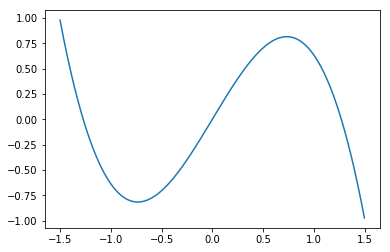

In [6]:
a = x[i] - 1.5
b = x[i] + 1.5

d = np.arange(a, b, 0.001)
vec = np.vectorize(function)

plt.plot(d, vec(d))
plt.show()

#### Esta función en particular tiene raíces también en -1.27 y 1.27, que se pueden encontrar cambiando el intervalo $(a, b)$

## 2. Método de la falsa posición o "regula falsi"

#### Sea $f(x) = (x + \exp({\frac{x}{2}}))*cos(x) + 5$, queremos resolver $f(x) = 0$ utilizando el método de la falsa posicion

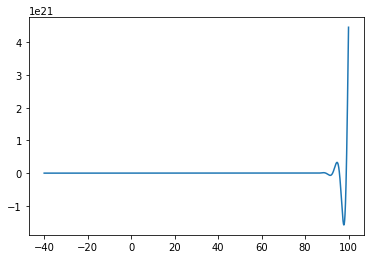

In [7]:
def f(x):
    return (x + np.exp(x/2))*np.cos(x) + 5


a = -40
b = 100

d = np.arange(a, b, 0.001)
vec = np.vectorize(f)

plt.plot(d, vec(d))
plt.show()

#### En el método de "regula falsi", procedemos de igual manera que en el método de la bisección. Pero en vez de recurrir a la próxima solución dividiendo el intervalo por la mitad, la misma será la intersección entre la abscisa y la recta que une los dos puntos que limitan el intervalo en esa iteración.

$$x_1 = a - \frac{f(a)(b-a)}{f(b)-f(a)}$$
ó
$$x_1 = b - \frac{f(b)(b-a)}{f(b)-f(a)}$$

#### Para las iteraciones siguientes, los intervalos variaran de acuerdo a la regla $f(x_k)*f(x_{k-1}) < 0$

#### Se termina obteniendo entonces dependiendo del resultado de dicha ecuación que: 
$$x_n = a_n - \frac{f(a_n)(x_{n-1} - a_n)}{f(x_{n-1}) - f(a_n)}$$
### ó
$$x_n = x_{n-1} - \frac{f(x_{n-1})(b_n - x_{n-1})}{f(b_n) - f(x_{n-1})}$$

In [47]:
a = -5
b = 5
x = []
x.append(a -  ( ( f(a)*(b-a) ) / ( f(b)- f(a) ) )) 
rel_err = 1
epsilon = 10**-15
i = 0
MAX_ITER = 1000

while(rel_err > epsilon and i < MAX_ITER):
    
    # Si la función es nula en ese punto, ya encontramos la solución.
    if(f(x[i]) == 0):
        break
    
    # Vemos en que intervalo esta la raiz.
    sgn = f(a)*f(x[i])
    
    if(sgn < 0):
        # Nuevo fin de intervalo.
        b = x[i]
    else:
        # Nuevo inicio de intervalo.
        a = x[i]
    
    # Agregar punto de recta que une los puntos del intervalo actual.
    res = a -  ( ( f(a)*(b-a) ) / ( f(b)- f(a) ) )
    x.append(res)
    
    # Incrementar posicion.
    i = i + 1
    
    # Calcular error relativo.
    if(x[i] != 0):
        rel_err = abs(x[i] - x[i-1]) / abs(x[i])

print("Cantidad de iteraciones:",i)
print("La solución es:",x[i],"pues la funcion en ese punto vale:",f(x[i]))


Cantidad de iteraciones: 13
La solución es: -17.56737070676262 pues la funcion en ese punto vale: 1.4210854715202004e-14


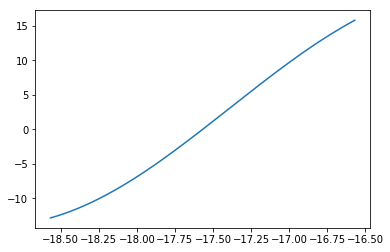

In [9]:
a = x[i] - 1
b = x[i] + 1

d = np.arange(a, b, 0.001)
vec = np.vectorize(f)

plt.plot(d, vec(d))
plt.show()

## 3. Método de las aproximaciones sucesivas o punto fijo

#### Método de convergencia más rapida que los anteriores. Utilizado como metodo de refinamiento.

#### Planteamos que $f(x) = y(x) - g(x) = 0$. Es decir que $f(x) = 0 == g(x) = y(x)$

#### Dicho de otro modo, buscamos una función $g(x)$ sabiendo que para el valor $x / f(x) = 0$ se cumple $g(x) = y(x)$

#### Se puede demostrar que existen condiciones suficientes, pero no necesarias, para crear una función $g(x)$ tal que al aplicar un método iterativo, esté convergera siempre.

#### Las condiciones son: 

#### 1. $g(x) \in C(a,b) $ y $g(x) \in [a;b]  \forall x \in [a,b] \implies g(x)$ tiene un punto fijo en $[a,b]$ 

#### 2. Si  $\exists \frac{dg}{dx} \in [a,b], y \exists m < 1 $ tal que: 
#### $|\frac{dg}{dx}| \leq m, \forall x \in [a,b] \implies $ el punto fijo en $[a,b]$ es único. 


#### Resolver la ecuación: $f(x) = 5exp(\frac{-x}{5})cos(x)$

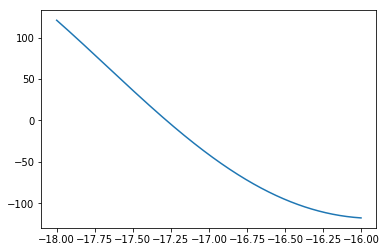

In [10]:
def f_s(x):
    return 5*np.exp(-x/5)*np.cos(x)

a = -18
b = -16

d = np.arange(a, b, 0.001)
vec = np.vectorize(f_s)

plt.plot(d, vec(d))
plt.show()

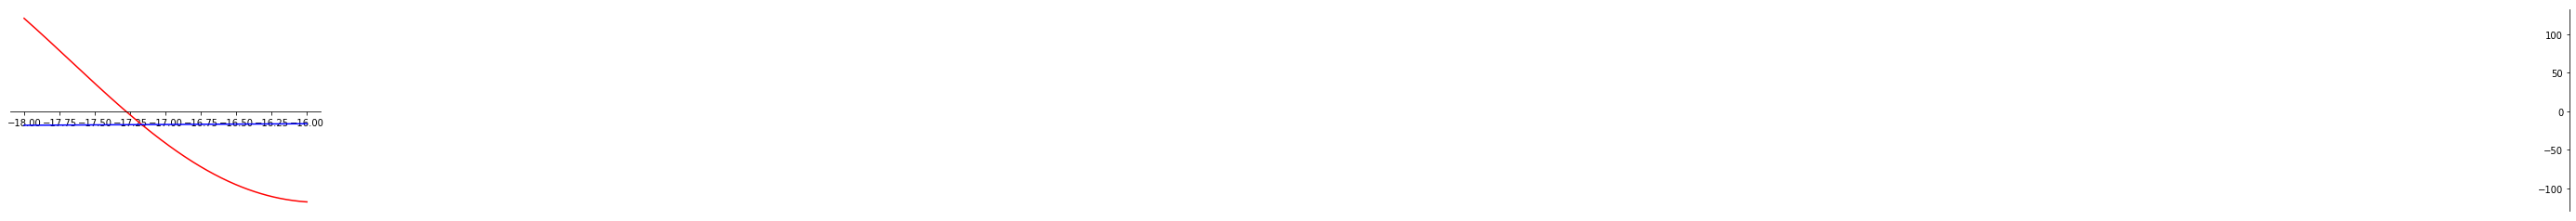

In [11]:
a = -18
b = -16

t = np.linspace(a, b, 400)
a = f_s(t)
b = t

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(t, a, 'r')
plt.plot(t, b, 'b')
plt.show()

#### Definimos una función para realizar nuestra función de punto fijo.

In [20]:
import sympy as sym

def esta_en_intervalo(a, b, g_pfijo):
    if(g_pfijo == None):
        return False
    
    # Vectorizamos la función en intervalos muy pequeños.
    d = np.arange(a, b, 0.01)
    vec = np.vectorize(g_pfijo)
    
    sup = np.amax(vec(d))
    inf = np.amin(vec(d))
    
    
    # if(sup > b or inf < a):
    #    return False
    
    return True
    
def intervalo_deriv(a, b, df_pfijo):
    
    # Vectorizamos la función en intervalos muy pequeños.
    d = np.arange(a, b, 0.01)
    vec = np.vectorize(df_pfijo)
    
    # Buscamos los maximos y minimos, asi encontramos las cotas de la derivada.
    sup = np.amax(vec(d))
    inf = np.amin(vec(d))

    return [inf, sup]
    
def strip_voids(M):
    
    M = filter(None, M)
    
    return M

def hallar_m(a, b, f_pfijo, m1, m2):
    OFFSET = 50
    # Vectorizamos la función en intervalos muy pequeños.
    X = np.arange(a, b, 0.01)
    F = np.vectorize(f_pfijo)
    F_arr = F(X)
    #print(X)
    #print(F_arr)
    
    m_arr = []
    M_arr = []
    inf = 0
    sup = 0
    for i in range(len(X)):
        dif = [X[i] - b, X[i] - a]
        if(dif[0] == 0 or dif[1] == 0):
            continue
            
        if(F_arr[i] <= 0):
            inf = F_arr[i] / dif[0]
            sup = F_arr[i] / dif[1]
        else:
            inf = F_arr[i] / dif[1]
            sup = F_arr[i] / dif[0]

        if(inf < sup):
            for j in np.arange(inf, sup, 0.1):
                m_arr.append(j)
        else:
            for j in np.arange(inf, inf+OFFSET, 0.1):
                m_arr.append(j)
            for j in np.arange(sup-OFFSET, sup, 0.1):
                m_arr.append(j)

        M_arr.append(list(set(m_arr)))

        
    from functools import reduce
    M_arr = strip_voids(M_arr)
    intersection = reduce(np.intersect1d, M_arr)
    
    m = m_derivada(intersection, m1, m2)
    
    return m
  
def m_derivada(M, m1, m2):
    MIN = -1
    MAX = 1
    
    inf = 0
    sup = 0
    
    min_dif = 1
    min_index = 0
    
    found = False
    for i in range(len(M)):
        if(M[i] == 0):
            continue
       
        if(M[i] < 0):
            inf = 1 - m1/M[i]
            sup = 1 - m2/M[i]
        else:
            inf = 1 - m2/M[i]
            sup = 1 - m1/M[i]
        
        if( (inf > MIN  and inf < 0) and (sup > 0 and sup < MAX)):
            found = True
            dif = abs(inf) if (abs(inf) > abs(sup)) else abs(sup)
            if(dif < min_dif):
                min_dif = dif
                min_index = i
    
    if(found):    
        return M[min_index]
    else:
        return None
                  
    
def buscar_g(a, b, f_pfijo):
    # Debe cumplir:
    #   1. g(x) pert [a,b] para todo x pert [a,b]
    #   2. m < 1, existe g'(x) tal que |g'(x)| <= m 
    #   para todo x pert [a,b]
    x = sym.Symbol('x')
    m = None
    g_pfijo = None
    
    # Guardo la función simbólica f
    sym_f = f_pfijo
    
    # Busco las derivadas de f
    df_pfijo = sym.diff(f_pfijo)
    
    # Las hago numericas:
    f_pfijo = sym.lambdify(x, f_pfijo)
    df_pfijo = sym.lambdify(x, df_pfijo)
    
    # Chequeo si hay raíces en el intervalo elegido    
    if(f_pfijo(a) * f_pfijo(b) > 0):
        print("La función no tiene raíces en el intervalo")
        return

    # Encontrar limites m1 y m2 para la derivada de f
    [m1, m2] = intervalo_deriv(a, b, df_pfijo)

    # Hallar constante de m tal que la derivada de g (en valor abs) sea menor a 1 y g este en el intervalo deseado
    m = hallar_m(a, b, f_pfijo, m1, m2)

    # Division por cero
    if(m == 0):
        print("Error hallando m")
        return

    if(m == None):
        print("No se encontro g(x) que cumpla las condiciones")
        return None
    
    return x - (1/m)*sym_f

        

#### Luego de realizada esta función, podemos proceder a utilizar SymPy para definir las funciones, y luego realizar el método

In [21]:
a = -18
b = -16

x = sym.Symbol('x')

f_pfijo = 5*sym.exp(-x/5)*sym.cos(x)
df_pfijo = sym.diff(f_pfijo)
df2_pfijo = sym.diff(df_pfijo)

g_pfijo = buscar_g(a, b, f_pfijo)
if(g_pfijo != None):
    print("Encontramos g es: " + str(g_pfijo))
    dg_pfijo = sym.diff(g_pfijo)
    dg_pfijo = sym.lambdify(x, dg_pfijo)

f_pfijo = sym.lambdify(x, f_pfijo)
g_pfijo = sym.lambdify(x, g_pfijo)


Encontramos g es: x + 0.0541675817531861*exp(-x/5)*cos(x)


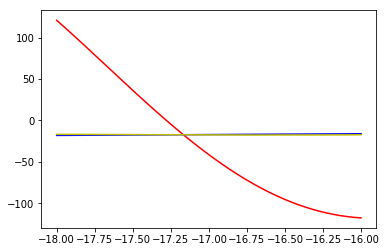

In [22]:
a = -18
b = -16

t = np.linspace(a, b, 1000)
a = f_pfijo(t)
b = t
c = g_pfijo(t)

fig = plt.figure()

plt.plot(t, a, 'r')
plt.plot(t, b, 'b')
if(c.all() != None):
    plt.plot(t, c, 'y')
plt.show()

#### Una vez que hallamos g, debemos implementar el método en sí.
#### El mismo se basa en tomar un valor inicial $x_0$ y sucesivamente utilizar la función hallada, para encontrar la raíz:
$$ x_n = g(x_{n-1})$$

In [46]:
a = -18
b = -16

MAX_ITER = 1000
i = 0
x = [0, 0]
TOL = 10**-15
err_rel = 1
x[0] = np.random.randint(-18, -16)

while(err_rel > TOL and i < MAX_ITER):
    
    # Llamar a funcion
    x[1] = g_pfijo(x[0])
    
    # Si hallamos la raiz terminamos
    if(f(x[1]) == 0):
        break
    
    # Calculamos el nuevo error relativo
    err_rel = abs(x[1] - x[0]) / abs(x[1])
    #print("Error relativo:",err_rel)
    
    # Actualizar valor
    x[0] = x[1]
    i = i + 1

print("Cantidad de iteraciones:",i)
print("La solución es:",x[1],"pues la funcion en ese punto vale:",f_s(x[1]))
    


Cantidad de iteraciones: 97
La solución es: -17.278759594743857 pues la funcion en ese punto vale: -9.508790898633903e-13


### 4. Método de Newton-Raphson

#### Este método es uno de los más poderosos que se conocen para resolver ecuaciones no lineales.

#### Una primera aproximación al método es partir del método de la falsa posición, y en vez de trazar una cuerda entre los dos extremos del intervalo, trazamos una tangente.

#### Supongamos que para el mismo intervalo $[a,b]$ trazamos la tangente que pasa por $f(b)$. Tendremos que:

#### $$ t(x) = f'(b)(x-b) + f(b)$$

#### Cuando tengamos $f(x) = 0$, también se cumplira que $t(x) = 0$. Entonces busacamos que:  
$$ 0 = f'(b)(x_1-b) + f(b)$$

#### Despejando obtenemos que: $x_1 = b - \frac{f(b)}{f'(b)}$

#### La sucesión queda entonces definida como $$x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})} $$

#### Resolvamos la ecuación $f(x) = 8sin(x + 5) $

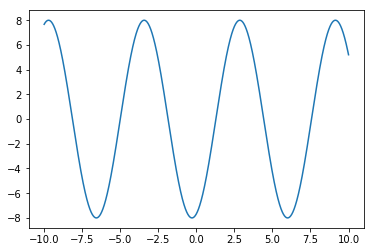

In [34]:
def funcion(x):
    return 8*np.sin(x + 5)

a = -10
b = 10

d = np.arange(a, b, 0.001)
vec = np.vectorize(funcion)

plt.plot(d, vec(d))
plt.show()

#### Utilizamos la libreria sympy para obtener la función y su derivada:

In [40]:
x = sym.Symbol('x')

sym_funcion = 8*sym.sin(x+5)
sym_dfuncion = sym.diff(sym_funcion)

num_funcion = sym.lambdify(x, sym_funcion)
num_dfuncion = sym.lambdify(x, sym_dfuncion)

#### Procedemos a realizar el metodo de Newton-Raphson:

In [43]:
a = -10
b = 10

MAX_ITER = 1000
i = 0
x = [0, 0]
TOL = 10**-15
err_rel = 1
x[0] = b

while(err_rel > TOL and i < MAX_ITER):
    
    # Llamar a func
    x[1] = x[0] - num_funcion(x[0]) / num_dfuncion(x[0])
    
    # Si hallamos la raiz terminamos
    if(funcion(x[1]) == 0):
        break
    
    # Calculamos el nuevo error relativo
    err_rel = abs(x[1] - x[0]) / abs(x[1])
    #print("Error relativo:",err_rel)
    
    # Actualizar valor
    x[0] = x[1]
    
    i = i + 1
    
print("Cantidad de iteraciones",i)
print("La solucion es:",x[1],", pues la funcion en ese punto vale:",num_funcion(x[1]))

Cantidad de iteraciones 5
La solucion es: 10.707963267948966 , pues la funcion en ese punto vale: 4.898587196589413e-15


### 5. Metodo de Steffensen

#### El metodo de Steffensen, es un método de convergencia acelerada, que se basa en una técnica denominada: Delta cuadrado de Aitken

#### Al aplicar el metodo ${\Delta}²$ de Aitken a una sucesión linealmente convergente, la nueva sucesión que converge cuadraticamente se construye mediante los siguientes terminos:

$x_0: x_1 = g(x_0); x_2 = g(x_1); \hat{x_0} = {{\Delta}²}(x_0); x_3 = g(x_2); \hat{x_1} = {{\Delta}²}(x_1) $

#### Donde: ${\Delta}²(x_n) = x_{n+2} - 2x_{n+1} + x_n $

#### Es decir que precisamos de los dos terminos posteriores a $x_n$ para poder calcular este término:

$$ (x_0, x_1, x_2) \implies (\hat{x}_0) $$
$$ (x_1, x_2, x_3) \implies (\hat{x}_1) $$
$$       ...         ...       ...      $$
$$ (x_{n-2}, x_{n-1}, x_m) \implies (\hat{x}_{n-2}) $$

#### En el metodo de Steffensen, utiliza este procedimiento para calcular los cuatro primeros terminos, pero luego introduce una leve modificación: en vez de proceder a calcular todos los nuevos valores, utiliza los previamente calculados para seguir calculando:

$${x_0}^{(0)}$$
$${x_1}^{(0)} = g({x_0}^{(0)})$$
$${x_2}^{(0)} = g({x_0}^{(0)})$$
$${x_0}^{(1)} = {{\Delta}²}({x_0}^{(0)})$$
#### Hasta aqui procedimos de la misma manera que en Aitken, pero ahora utilizaremos el nuevo $x_0$ recientemente calculado para proceder, y luego el nuevo $x_1$ calculado:
$${x_1}^{(1)} = g({x_0}^{(1)})$$
$${x_2}^{(1)} = g({x_1}^{(1)})$$
$${x_0}^{(2)} = {{\Delta}²}({x_0}^{(1)})$$

#### Generalizando:

$$ {x_0}^{(k)} = {\Delta}² ({x_0}^{(k-1)}) $$
$$ {x_1}^{(k)} = g({x_0}^{(k)}) $$
$$ {x_2}^{(k)} = g({x_1}^{(k)}) $$
$$ \forall k > 0 $$

In [81]:
def g(x):
    return (2 - np.exp(x) + pow(x, 2)) / 3

a = -1
b = 3

MAX_ITER = 1000
it = 0
x = [0, 0, 0]
TOL = 10**-15
err_rel = 1
x[0] = 0.5
i = 1

while(err_rel > TOL and it < MAX_ITER):
    
    print("x_0:",x[0],"x_1:",x[1],"x_2:",x[2])
    
    if(i == 3):
        x[0] = x[0] - ( ( (x[1] - x[0])**2) / (x[2] - 2*x[1] + x[0]) )
        i = 1
    
    x[i] = g(x[i-1])
    #print("g(",x[i-1],") es:",g(x[i-1]))
    # Si hallamos la raiz terminamos
    if(g(x[i]) == x[i]):
        break
    
    # Calculamos el nuevo error relativo
    if(x[i] != 0):
        err_rel = abs(x[i] - x[i-1]) / abs(x[i])
    #print("Error relativo:",err_rel)
    
    i = i + 1
    it = it + 1

if(i == 3):
    i = 2
    
print("Cantidad de iteraciones",it)
print("La solucion es:",x[i],", pues la funcion de punto fijo en ese punto vale:",g(x[i]))

x_0: 0.5 x_1: 0 x_2: 0
x_0: 0.5 x_1: 0.20042624309995727 x_2: 0
x_0: 0.5 x_1: 0.20042624309995727 x_2: 0.27274906509837465
x_0: 0.2586844275657909 x_1: 0.2572308766813142 x_2: 0.27274906509837465
x_0: 0.2586844275657909 x_1: 0.2572308766813142 x_2: 0.25760800957543667
x_0: 0.2575303177198077 x_1: 0.25753027706138093 x_2: 0.25760800957543667
x_0: 0.2575303177198077 x_1: 0.25753027706138093 x_2: 0.25753028761455227
Cantidad de iteraciones 6
La solucion es: 0.25753028543986073 , pues la funcion de punto fijo en ese punto vale: 0.25753028543986073
